# Example of usage ImageScaler in Spark OCR

## Install spark-ocr python packge
Need specify path to `spark-ocr-assembly-[version].jar` or `secret`

In [ ]:
secret = ""
license = ""
version = secret.split("-")[0]
spark_ocr_jar_path = "../../target/scala-2.11"

In [ ]:
%%bash
if python -c 'import google.colab' &> /dev/null; then
    echo "Run on Google Colab!"
    echo "Install Open JDK"
    apt-get install -y openjdk-8-jdk-headless -qq > /dev/null
    java -version
fi

Run on Google Colab!
Install Open JDK


openjdk version "1.8.0_312"
OpenJDK Runtime Environment (build 1.8.0_312-8u312-b07-0ubuntu1~18.04-b07)
OpenJDK 64-Bit Server VM (build 25.312-b07, mixed mode)


In [ ]:
import sys
import os

if 'google.colab' in sys.modules:
  os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
  os.environ["PATH"] = os.environ["JAVA_HOME"] + "/bin:" + os.environ["PATH"]

In [ ]:
# install from PYPI using secret
# %pip install spark-ocr==$version+spark30 --extra-index-url=https://pypi.johnsnowlabs.com/$secret --upgrade

In [ ]:
# or install from local path
# %pip install ../../python/dist/spark-ocr-3.6.0+spark30.tar.gz

## Initialization of spark session

In [ ]:
from pyspark.sql import SparkSession
from sparkocr import start

if license:
    os.environ['JSL_OCR_LICENSE'] = license

spark = start(secret=secret, jar_path=spark_ocr_jar_path)
spark

Spark version: 3.2.1
Spark NLP version: 4.0.0
Spark OCR version: 4.0.0



## Import OCR transformers

In [ ]:
from sparkocr.transformers import *
from pyspark.ml import PipelineModel
from sparkocr.utils import display_images
import pkg_resources

## Read Image and display it


    Image #0:
    Origin: file:/root/.local/lib/python3.7/site-packages/sparkocr/resources/ocr/images/noised.png
    Resolution: 143 dpi
    Width: 1312 px
    Height: 948 px
    Mode: ImageType.TYPE_BYTE_GRAY
    Number of channels: 1


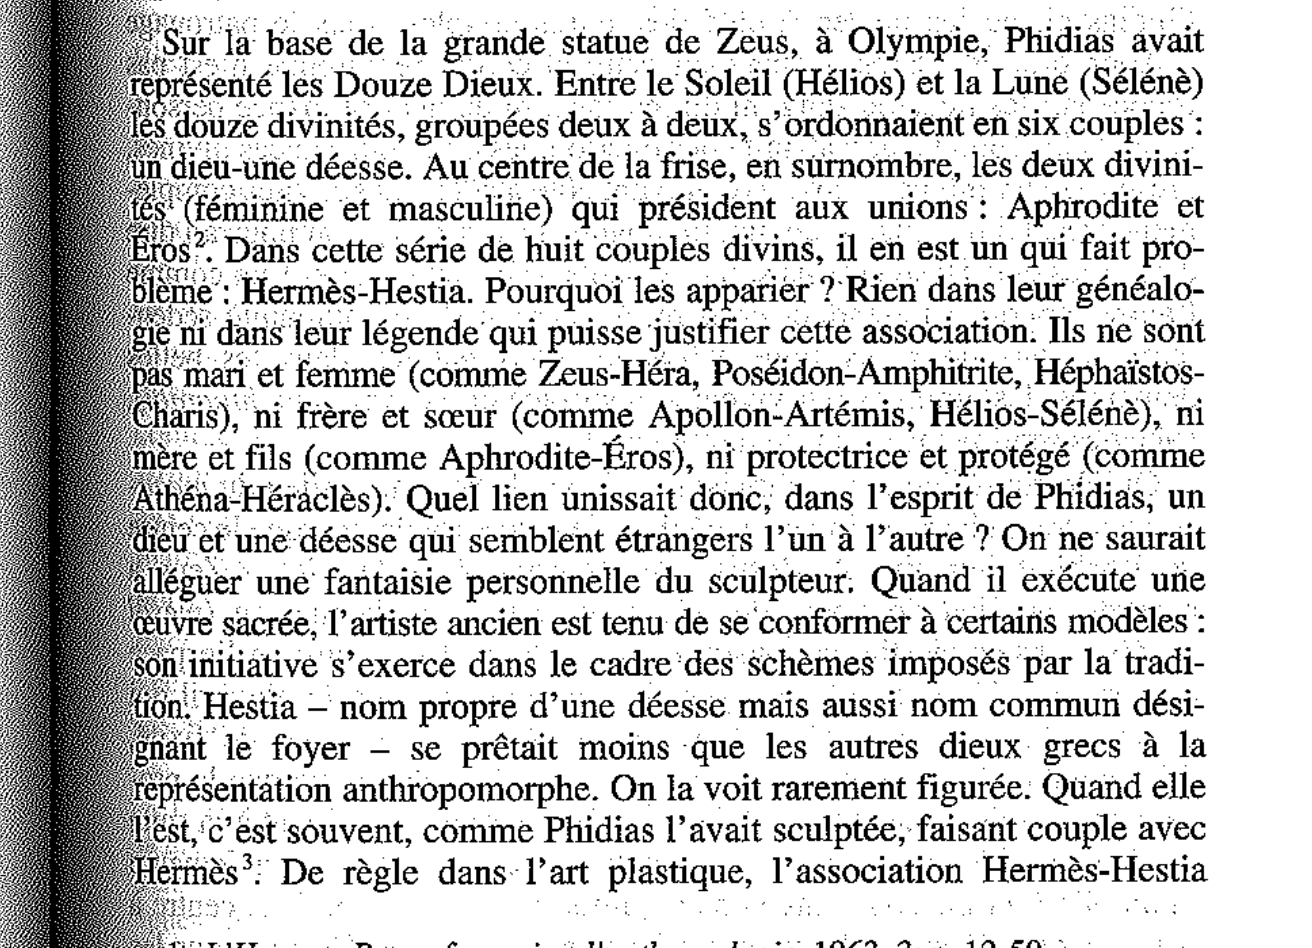

In [ ]:
imagePath = pkg_resources.resource_filename('sparkocr', 'resources/ocr/images/noised.png')
image_df = BinaryToImage().transform(spark.read.format("binaryFile").load(imagePath)).cache()
display_images(image_df)

## Rescale image using scaling factor


    Image #0:
    Origin: file:/root/.local/lib/python3.7/site-packages/sparkocr/resources/ocr/images/noised.png
    Resolution: 143 dpi
    Width: 656 px
    Height: 474 px
    Mode: ImageType.TYPE_BYTE_GRAY
    Number of channels: 1


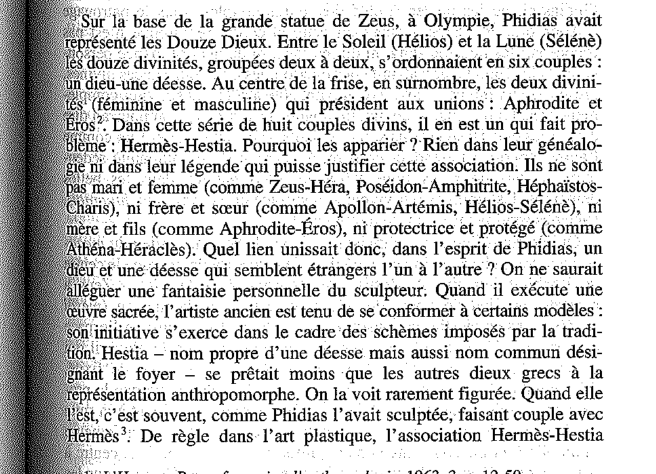

In [ ]:
display_images(ImageScaler().setScaleFactor(0.5).transform(image_df), "scaled_image")

## Rescale image by setting fixed _height_


    Image #0:
    Origin: file:/root/.local/lib/python3.7/site-packages/sparkocr/resources/ocr/images/noised.png
    Resolution: 143 dpi
    Width: 553 px
    Height: 400 px
    Mode: ImageType.TYPE_BYTE_GRAY
    Number of channels: 1


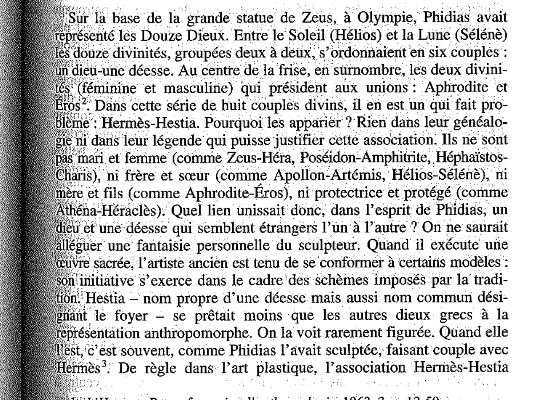

In [ ]:
display_images(ImageScaler().setHeight(400).transform(image_df), "scaled_image")

## Rescale image by setting fixed _width_


    Image #0:
    Origin: file:/root/.local/lib/python3.7/site-packages/sparkocr/resources/ocr/images/noised.png
    Resolution: 143 dpi
    Width: 400 px
    Height: 289 px
    Mode: ImageType.TYPE_BYTE_GRAY
    Number of channels: 1


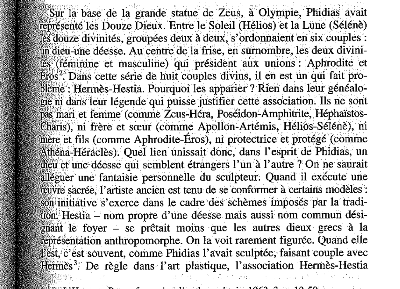

In [ ]:
display_images(ImageScaler().setWidth(400).transform(image_df), "scaled_image")

## Rescale image by setting fixed _witdth_ and _height_


    Image #0:
    Origin: file:/root/.local/lib/python3.7/site-packages/sparkocr/resources/ocr/images/noised.png
    Resolution: 143 dpi
    Width: 400 px
    Height: 200 px
    Mode: ImageType.TYPE_BYTE_GRAY
    Number of channels: 1


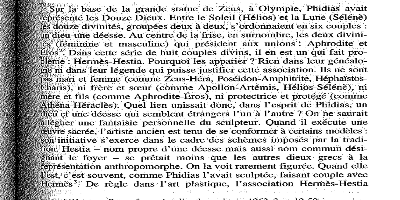

In [ ]:
display_images(ImageScaler().setWidth(400).setHeight(200).transform(image_df), "scaled_image")

## Rescale image by setting fixed _height_, _width_ and keep original ratio


    Image #0:
    Origin: file:/root/.local/lib/python3.7/site-packages/sparkocr/resources/ocr/images/noised.png
    Resolution: 143 dpi
    Width: 800 px
    Height: 300 px
    Mode: ImageType.TYPE_BYTE_GRAY
    Number of channels: 1


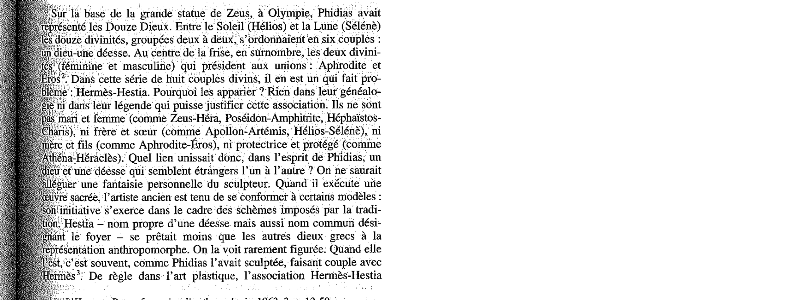

In [ ]:
display_images(ImageScaler().setWidth(800).setHeight(300).setKeepRatio(True).transform(image_df), "scaled_image")